In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

plt.rcParams["figure.figsize"] = (20,15)

In [2]:
#For the first part of lab, we'll be using the CDF
#(cumulative distribution function) on a Gaussian
#distribution to find the values associated with various
#sigma values. The CDF will take the integral from the 
#leftside of the distribution.

stats.norm.cdf(0, loc = 0, scale = 1)
#This comes out to 0.5. The first variable
#of the cdf function is the sigma value, so in this
#case it is 0 (where the mean lies). loc determines
#the mean, and scale determines the std. dev.

0.5

In [3]:
#The 0.5 tells us that 50% of the distribution is within the
#leftside of the distribution to the value 0. Which makes
#sense since a Gaussian distribution is symmetrical, and the
#mean in this case is 0.

In [4]:
#1 Std. Dev (1 sigma)
x = stats.norm.cdf(1, loc = 0, scale = 1)
x
#This comes out to 84.1%. The cdf takes the integral
#of the distribution from the leftside. In other words, 1 std.
#diviation includes 34.1% of the distribution from the mean.

0.8413447460685429

In [5]:
#2 std. dev. (2 sigma)
y = stats.norm.cdf(2, loc = 0, scale = 1)
y
#Comes out to 97.7%

0.9772498680518208

In [6]:
#3 std. dev. (3 sigma)
z = stats.norm.cdf(3, loc = 0, scale = 1)
z
#This comes out to 99.8%

0.9986501019683699

In [7]:
#Now we will be doing the inverse, determining the sigma value
#when given a probability. This will be done by evaluating the
#probability values using the PPF (percent point function),
#which is the inverse of the CDF.

#p=0.5
stats.norm.ppf(0.5, loc = 0, scale = 1)
#This comes out to 0. Which means a sigma of 0, which makes
#sense as the distribution is split evenly at 0.

0.0

In [8]:
#p=0.841
stats.norm.ppf(x, loc = 0, scale = 1)
#This comes out to 1 sigma.

1.0

In [9]:
#p=0.977
stats.norm.ppf(y, loc = 0, scale = 1)
#This comes out to 2 sigma.

2.0000000000000004

In [10]:
#p=0.998
stats.norm.ppf(z, loc = 0, scale = 1)
#This comes out to 3 sigma.

2.9999999999999982

In [11]:
#Now we'll be doing similar operations as above, however this
#time on a Rayleigh distribution.

In [12]:
#This will be our randomly generated data set on a Rayleigh
#distribution.
d = stats.rayleigh.rvs(loc = 0, scale = 0.01, size = 
                      100000)

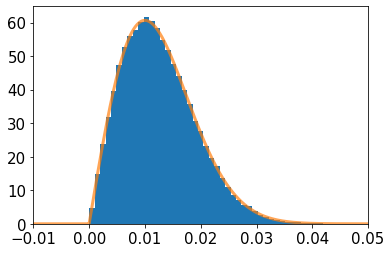

In [13]:
#The randomly generated data set will be plotted with an
#analytic PDF.
fig, ax = plt.subplots(1, 1)
ax.hist(d, 50, density = True)
plt.tick_params(labelsize = 15)
plt.xlim([-0.01, 0.05])
x = np.linspace(-0.01, 0.05, 1000)
ax.plot(x, stats.rayleigh.pdf(x, loc = 0, scale = 0.01),
    linewidth = 3, alpha = 0.7)
plt.show()

In [14]:
#Instead of being a symmetrical distribution, we see that a
#Rayleigh distribution is skewed to the right. Lets present a
#hypothetical problem dealing with the above Rayleigh
#distribution.


#What's the probability that the background produces 
#a signal from the background that is greater than a value
#of 0.025?

In [15]:
prob = stats.rayleigh.cdf(0.025, loc = 0, scale = 0.01)

#The CDF is taken from the left, so we will subtract this
#value from 1.
fixedProb = 1 - prob
fixedProb #This is the probability

0.04393693362340745

In [16]:
sigma = stats.rayleigh.ppf(fixedProb, loc = 0,
                              scale = 0.01)
sigma #This is the associated sigma value of the probability

0.0029977124309520852

In [17]:
#Non-continuous distributions: now we will be working with
#non-continuous distributions, specifically with binomial
#distributions.

#This will randomly generate the data set when n=0 and p=0.5,
#where 'n' is the number of attempts and 'p' is the
#probability of success.
b = stats.binom.rvs(10, 0.5, loc = 0, size 
                       = 1000)

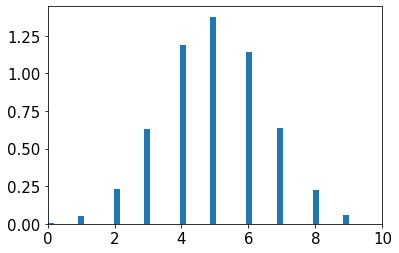

In [18]:
#Plot of the randomly generated data set
fig, graph = plt.subplots(1, 1)
graph.hist(b, 50, density = True)
plt.tick_params(labelsize = 15)
plt.xlim([0, 10])
plt.show()

In [19]:
#When the probability of success is 50%, the
#distribution looks close to symmetrical. In
#this case, the mode is 5 and the "tails" on
#either side of 5 look even.

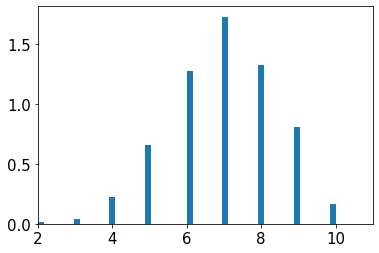

In [20]:
#Now lets increase to p = 0.7
c = stats.binom.rvs(10, 0.7, loc = 0, size 
                       = 1000)

fig, graph = plt.subplots(1, 1)
graph.hist(c, 50, density = True)
plt.tick_params(labelsize = 15)
plt.xlim([2, 11])
plt.show()

In [21]:
#When the probability is above 50%, the
#distribution becomes skewed to the left and
#the mode becomes 7. 

In [42]:
#For this case, lets have the number of attempts represent
#the number of black and red ants we observe. For each ant,
#there is a 70% chance of the ant being red. What would be
#the probability that the number of red ants be 5?

#We will use the CDF to solve this. The CDF integrates from
#the left, so we will take the CDF up to 5 and up to 4, then
#take the difference.

upLim = stats.binom.cdf(5, 10, 0.7)
lowLim = stats.binom.cdf(4, 10, 0.7)
upLim - lowLim

0.10291934520000004

In [23]:
#There is a 10.3% chance of observing 5 red ants out of a
#sample of 10 ants.

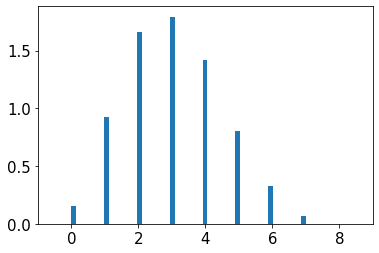

In [24]:
#Lets see how changing parameters will affect the binomial
#distribution.

#Decrease p to 0.3
d = stats.binom.rvs(10, 0.3, loc = 0, size 
                       = 1000)
fig, graph = plt.subplots(1, 1)
graph.hist(d, 50, density = True)
plt.tick_params(labelsize = 15)
plt.xlim([-1, 9])
plt.show()

In [25]:
#When the probability is less than 50%,
#the distribution becomes skewed to the right.
#And the mode becomes 3.

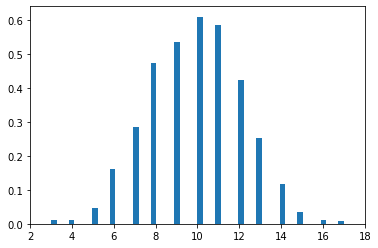

In [26]:
#Now we'll change the number of attempts per trial
#This first one we'll increase the number of attempts
#to 20
e = stats.binom.rvs(20, 0.5, loc = 0, size 
                       = 1000)

fig, graph = plt.subplots(1, 1)
graph.hist(e, 50, density = True)
plt.tick_params(labelsize = 10)
plt.xlim([2, 18])
plt.show()

In [27]:
#When the number of attempts per trial is increased,
#while keeping the probability at 50%, the distribution
#looks somewhat even. However, depending on the set of data,
#the mode can vary, where the peak of the graph can span
#roughly between 9 and 11. Also, the distribution becomes
#wider and spans a greater range of values.

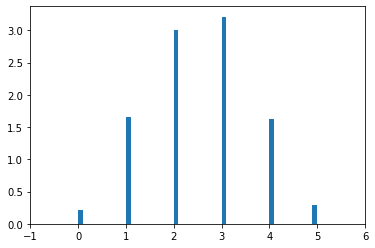

In [28]:
#We will decrease the number of attempts per trial to 5.
f = stats.binom.rvs(5, 0.5, loc = 0, size 
                       = 1000)
fig, graph = plt.subplots(1, 1)
graph.hist(f, 50, density = True)
plt.tick_params(labelsize = 10)
plt.xlim([-1, 6])
plt.show()

In [29]:
#When the number of attempts is decreased while keeping
#the probability at 50%, the distribution still looks 
#symmetrical. And the mode is 2 and/or 3. The range of
#values has decreased to 5.

In [30]:
#Binomial distributions are discrete, meaning that the data
#being presented is non-continuous, where each measurement
#is an integer and not a floating point. This makes the 
#probability of occurance of each value discrete as well,
#which can be seen by the bionomial distribution plots above.
#None of the values between the integers have a probability
#of occurence, only the integers do.

#Binomial distributions should be incorporated into
#experiments that deal with countable measurements, such as,
#the number of meteors seen within an hour, the number of
#trees within an area, and the number of particles passing
#through an object.

In [31]:
#Although the distribution is discrete, the parameters of the
#distribution are not. For example, the mean of a binomial
#distribution with n=0 and p=0.5 is:

stats.binom.mean(5, 0.5, loc = 0)

2.5

In [32]:
#The mean does not change throughout the distribution, as the
#measurements and the amount of measurements do not change;
#each distribution has a distinct mean. Other parameters that
#are non-discrete are the median, variance and standard
#deviation which are shown below.

stats.binom.median(5, 0.5, loc = 0)

2.0

In [33]:
stats.binom.var(5, 0.5, loc = 0)

1.25

In [34]:
stats.binom.std(5, 0.5, loc = 0)

1.118033988749895